In [106]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
path =r'C:\Continuum\Anaconda2\envs\TFENV\IPL_MOST_RUNS' # use your path
allFiles = glob.glob(path + "/*.csv")
df_ms_runs = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=0)
    team = (file_.rsplit('.csv', 1)[0]).rsplit('_', 1)[1]
    year = (file_.rsplit('.csv', 1)[0]).rsplit('_', 2)[1]
    df['team'] = team
    df['year'] = year
    list_.append(df)
df_ms_runs = pd.concat(list_)


In [11]:
df_ms_runs['status'] = 'DQ'

In [12]:
df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'MI')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'RPS')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'SRH')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'RCB')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'MI')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'CSK')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'KKR')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'KP')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2013') & (df_ms_runs['team'] == 'MI')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2013') & (df_ms_runs['team'] == 'CSK')),'status']='R'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'KKR')),'status']='W'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'CSK')),'status']='R'

df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'SRH')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2017') & (df_ms_runs['team'] == 'KKR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'GL')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2016') & (df_ms_runs['team'] == 'KKR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'RR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2015') & (df_ms_runs['team'] == 'RCB')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'MI')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2014') & (df_ms_runs['team'] == 'CSK')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2013') & (df_ms_runs['team'] == 'RR')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'DD')),'status']='Q'
df_ms_runs.loc[((df_ms_runs['year'] == '2012') & (df_ms_runs['team'] == 'MI')),'status']='Q'

In [3]:
cols = list(df_ms_runs.columns)

In [4]:
df_ms_runs[cols] = df_ms_runs[cols].astype(object)

In [5]:
for col in cols:
    df_ms_runs[''''''+str(col)+''''''][df_ms_runs[''''''+str(col)+''''''] == '-'] = 0.0

In [153]:
#df_ms_runs
df_ms_runs.to_csv('df_ms_runs.csv')

In [7]:
cols =['Mat','Inns','NO','Runs','100','50','0','4s','6s','BF']
df_ms_runs[cols] = df_ms_runs[cols].astype(int)

In [10]:
flot_cols = ['Ave','SR']
df_ms_runs[flot_cols] = df_ms_runs[flot_cols].apply(pd.to_numeric)

In [91]:
df_batsmen = df_ms_runs[df_ms_runs['Inns'].astype(float) > 0.0]

In [92]:
df_batsmen.reset_index(drop=True,inplace=True)

In [93]:
df_batsmen.drop(df_batsmen[df_batsmen['team'] == 'DC'].index ,inplace= True)
df_batsmen.drop(df_batsmen[df_batsmen['team'] == 'PW'].index , inplace= True)


C:\Continuum\Anaconda2\envs\TFENV\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Continuum\Anaconda2\envs\TFENV\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
def get_batting_statistics(df,parameter, statistic,output):
    df = df.groupby(['year','team','status'], as_index='False').agg({parameter: statistic}).apply(lambda x : round(x,2))
    df.reset_index(level = ['team','year','status'], inplace=True)
    piv_tbl = df.pivot(columns='team', values= output, index='year')
    return piv_tbl

# Qualification Status of all the Teams

In [380]:
df = get_batting_statistics(df_batsmen,'Runs','max','status')
print (df)
win_teams={df.index[i]:team for i in range(6) for team , status  in df.iloc[i].items() if(status == 'W')}
df2=pd.DataFrame.from_dict(data = win_teams, orient ='index')
df2.sort_index(ascending=True,inplace=True)
df2['year']=df2.index.get_values()
df2['val']=1
df2.columns=['win_team','year','val']
df2.reset_index(drop=True,inplace=True)
df3 = df2.pivot_table(columns='year',values='val',fill_value=0,index='win_team')

team   CSK  DD    GL KKR  KP  MI RCB   RPS    RR   SRH
year                                                  
2012     R   Q  None   W  DQ   Q  DQ  None    DQ  None
2013     R  DQ  None  DQ  DQ   W  DQ  None     Q    DQ
2014     Q  DQ  None   W   R   Q  DQ  None    DQ    DQ
2015     R  DQ  None  DQ  DQ   W   Q  None     Q    DQ
2016  None  DQ     Q   Q  DQ  DQ   R    DQ  None     W
2017  None  DQ    DQ   Q  DQ   W  DQ     R  None     Q
  win_team  year
0      KKR  2012
1       MI  2013
2      KKR  2014
3       MI  2015
4      SRH  2016
5       MI  2017


# Mean/Max/Min Runs scored by the batsmen of all Teams

team     CSK      DD      GL     KKR      KP      MI     RCB     RPS      RR  \
year                                                                           
2012  181.13  119.14     NaN  168.29  108.86  106.05  123.74     NaN  149.56   
2013  166.94  100.14     NaN  101.62  121.68  177.81  121.50     NaN  135.32   
2014  209.92  104.11     NaN  148.25  166.12  131.47  110.67     NaN   98.05   
2015  197.23  128.81     NaN  121.19  104.94  153.59  115.26     NaN  135.87   
2016     NaN  110.83  136.35  133.31  102.55  123.00  168.41  103.26     NaN   
2017     NaN  118.39  128.28  123.89  116.61  154.24   97.78  118.50     NaN   

team     SRH  
year          
2012     NaN  
2013  128.12  
2014  121.44  
2015  132.31  
2016  159.31  
2017  141.38  


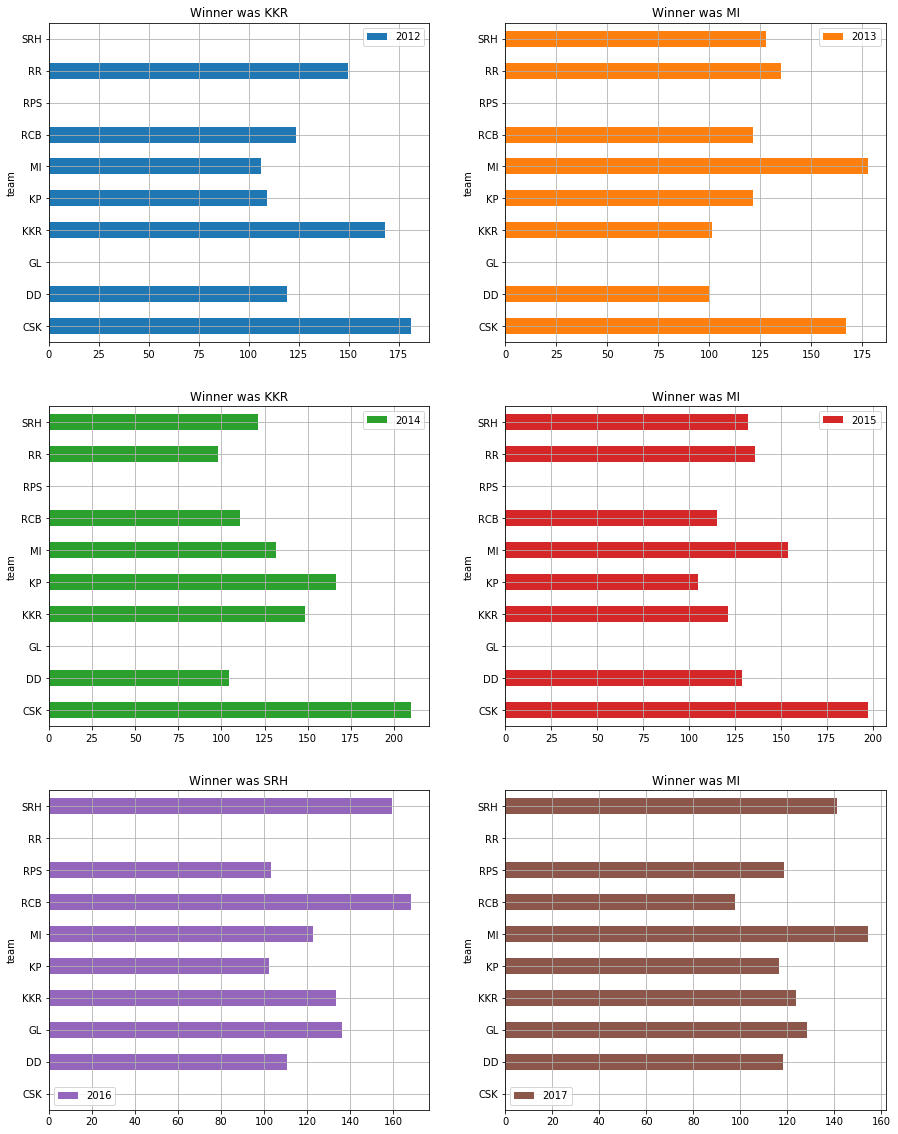

In [404]:
df = get_batting_statistics(df_batsmen,'Runs','mean','Runs')
print (df)
axes = df.T.plot(kind = 'barh',grid = True,subplots = True ,
                 sharex=False,
                 title =['Winner was '+str(df3[df3[col] == 1].index.get_values().tolist()[0]) for col in df3.columns],
                 layout=(3,2), figsize = (15,20) )

# Mean/Max/Min Average of the batsmen of all Teams

team    CSK     DD     GL    KKR     KP     MI    RCB   RPS     RR    SRH
year                                                                     
2012  15.91  19.70    NaN  20.20  15.00   9.91   7.75   NaN  19.50    NaN
2013  15.22  16.00    NaN  15.00  13.50  18.46  13.53   NaN   9.75  17.41
2014  28.37  14.37    NaN  17.66  25.00  13.33  14.33   NaN  13.40  15.71
2015  19.25  19.82    NaN  15.47  12.04  20.40  10.00   NaN  16.77  21.68
2016    NaN  11.42  12.37  16.40  15.98  17.70  13.76  21.0    NaN  17.91
2017    NaN  17.16  17.61  15.75  17.62  19.57  13.72  11.5    NaN  25.75


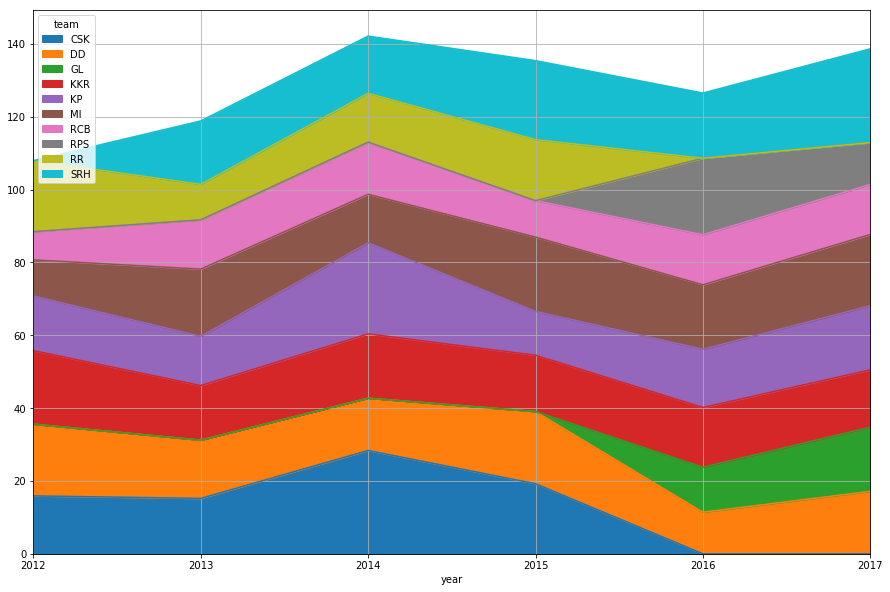

In [431]:
df= get_batting_statistics(df_batsmen,'Ave','median','Ave')
print (df)
axes = df.plot(y=None, kind = 'area',grid = True,
                 sharex = False,
                 #subplots = True , layout=(5,3),
                 figsize = (15,10) )

# Mean/Max/Min Strike Rate of the batsmen of all Teams

In [266]:
df=get_batting_statistics(df_batsmen,'SR','mean','SR')
print (df)
#axes = df.plot.pie(x=df.index.get_values(),y=df.columns,subplots = True, layout=(5,3), figsize = (15,20))

team     CSK      DD      GL     KKR      KP      MI     RCB     RPS      RR  \
year                                                                           
2012  125.58   95.33     NaN  123.29  127.89   87.14  117.02     NaN  113.53   
2013   87.70   98.44     NaN  103.41  101.84  107.55  101.03     NaN   91.69   
2014  124.08   92.09     NaN  109.87  111.38  100.44  128.54     NaN  109.31   
2015  121.70  106.68     NaN  123.22  102.01  116.13  125.53     NaN  111.61   
2016     NaN   98.38  104.23  112.88  119.65  109.64  123.04  100.56     NaN   
2017     NaN  110.06  104.23  111.48  111.58  139.52   98.74  109.26     NaN   

team     SRH  
year          
2012     NaN  
2013   97.56  
2014   95.26  
2015  120.98  
2016  127.58  
2017  107.49  


# Mean/Max/Min Number of 6's hit by batsmen of all Teams

team    CSK    DD    GL   KKR     KP     MI    RCB   RPS    RR   SRH
year                                                                
2012  102.0  97.0   NaN  69.0   61.0   79.0  117.0   NaN  69.0   NaN
2013   84.0  50.0   NaN  56.0   65.0  117.0  104.0   NaN  70.0  51.0
2014  112.0  63.0   NaN  76.0  127.0   86.0   92.0   NaN  86.0  72.0
2015   96.0  84.0   NaN  64.0   79.0  120.0  105.0   NaN  65.0  79.0
2016    NaN  65.0  63.0  65.0   54.0   92.0  142.0  68.0   NaN  89.0
2017    NaN  87.0  92.0  87.0   88.0  117.0   75.0  89.0   NaN  70.0


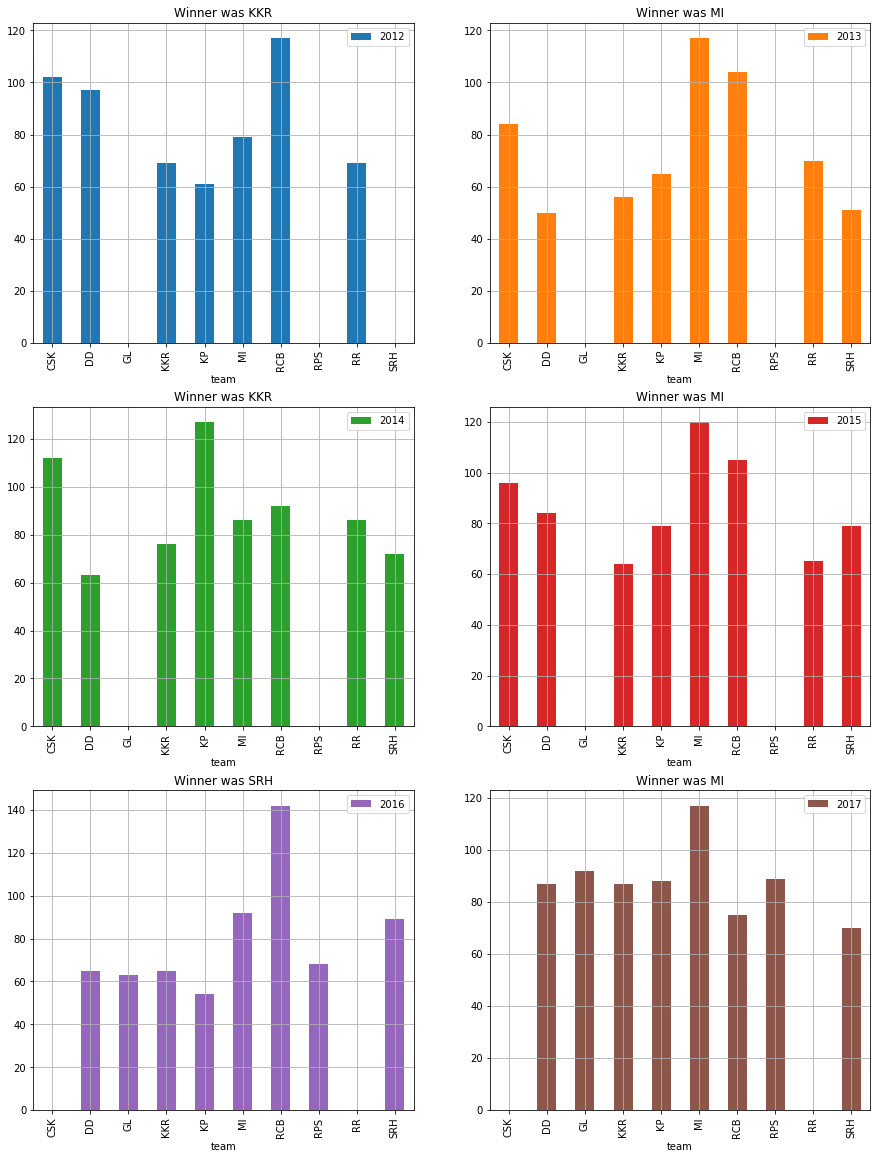

In [460]:
df=get_batting_statistics(df_batsmen,'6s','sum','6s')
print (df)

#plt.figure(figsize=(15,10))
#for i in df.columns:
 #   df[i].plot(kind = 'bar',#linestyle= '-',marker = 'o',
               #markevery =df2[df2[0] == i].index.get_values().tolist(),
               #markerfacecolor='r',
 #              grid = True ,legend=True)
#plt.legend(prop = {'size':20})    
axes = df.T.plot(kind = 'bar',grid = True,subplots = True ,
                 legend=True, sharex=False,
                 title = ['Winner was '+str(df3[df3[col] == 1].index.get_values().tolist()[0]) for col in df3.columns],
                 layout=(3,2), figsize = (15,20) )

# Mean/Max/Min Number of 4's hit by batsmen of all Teams

team    CSK     DD     GL    KKR     KP     MI    RCB    RPS     RR    SRH
year                                                                      
2012  223.0  232.0    NaN  210.0  226.0  219.0  186.0    NaN  246.0    NaN
2013  241.0  210.0    NaN  222.0  244.0  252.0  229.0    NaN  267.0  197.0
2014  205.0  177.0    NaN  223.0  262.0  197.0  165.0    NaN  166.0  167.0
2015  249.0  188.0    NaN  206.0  144.0  242.0  206.0    NaN  187.0  185.0
2016    NaN  179.0  242.0  194.0  191.0  185.0  239.0  171.0    NaN  231.0
2017    NaN  202.0  218.0  228.0  187.0  224.0  133.0  197.0    NaN  220.0


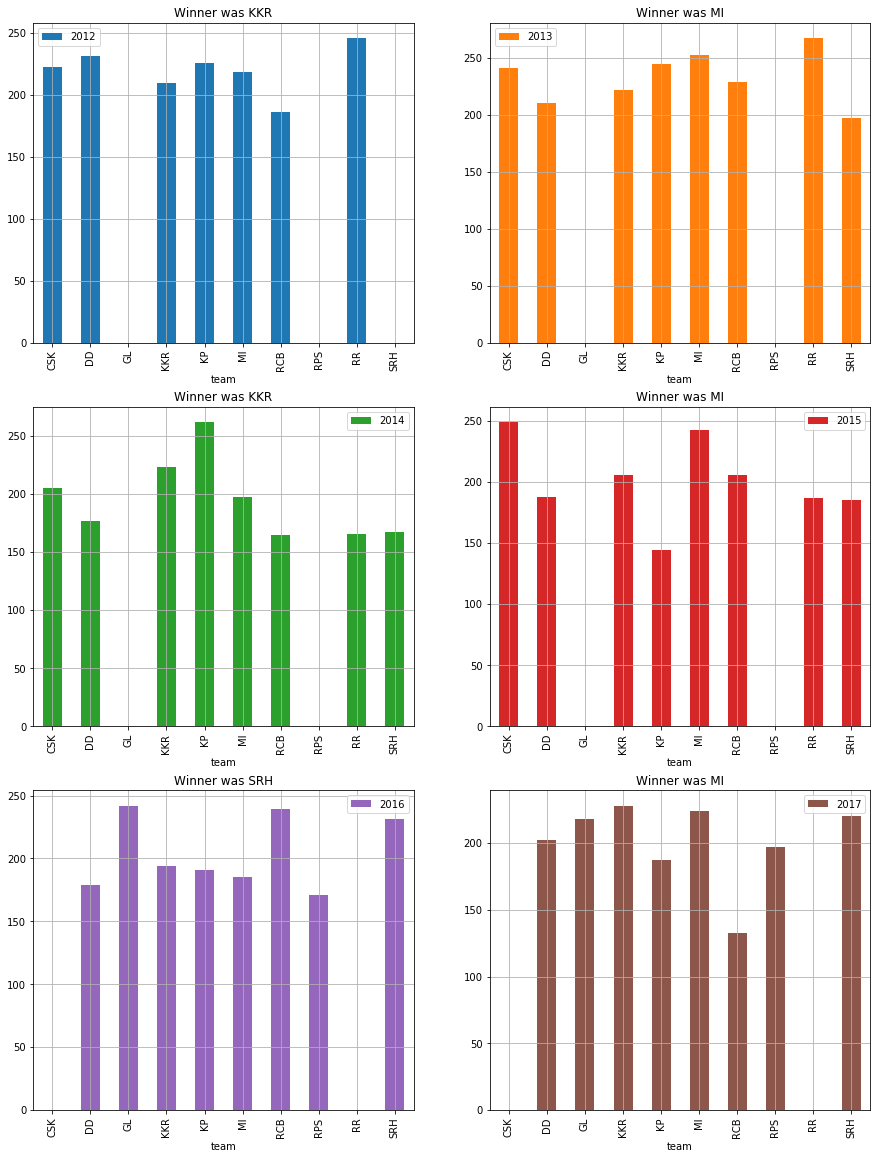

In [462]:
df = get_batting_statistics(df_batsmen,'4s','sum','4s')
print (df)
axes = df.T.plot(kind = 'bar',grid = True,subplots = True ,
                 legend=True, sharex=False,
                 title = ['Winner was '+str(df3[df3[col] == 1].index.get_values().tolist()[0]) for col in df3.columns],
                 layout=(3,2), figsize = (15,20) )

# Mean/Max/Min Number of 50's scored by batsmen of all Teams

team   CSK    DD    GL   KKR    KP    MI   RCB   RPS    RR   SRH
year                                                            
2012  15.0  21.0   NaN  14.0  21.0  22.0  19.0   NaN  16.0   NaN
2013  16.0  21.0   NaN  21.0  19.0  16.0  20.0   NaN  19.0  17.0
2014  12.0  19.0   NaN  16.0  17.0  17.0  18.0   NaN  21.0  16.0
2015  13.0  16.0   NaN  16.0  18.0  17.0  19.0   NaN  15.0  16.0
2016   NaN  18.0  17.0  16.0  20.0  17.0  17.0  19.0   NaN  16.0
2017   NaN  18.0  18.0  19.0  18.0  17.0  18.0  20.0   NaN  16.0


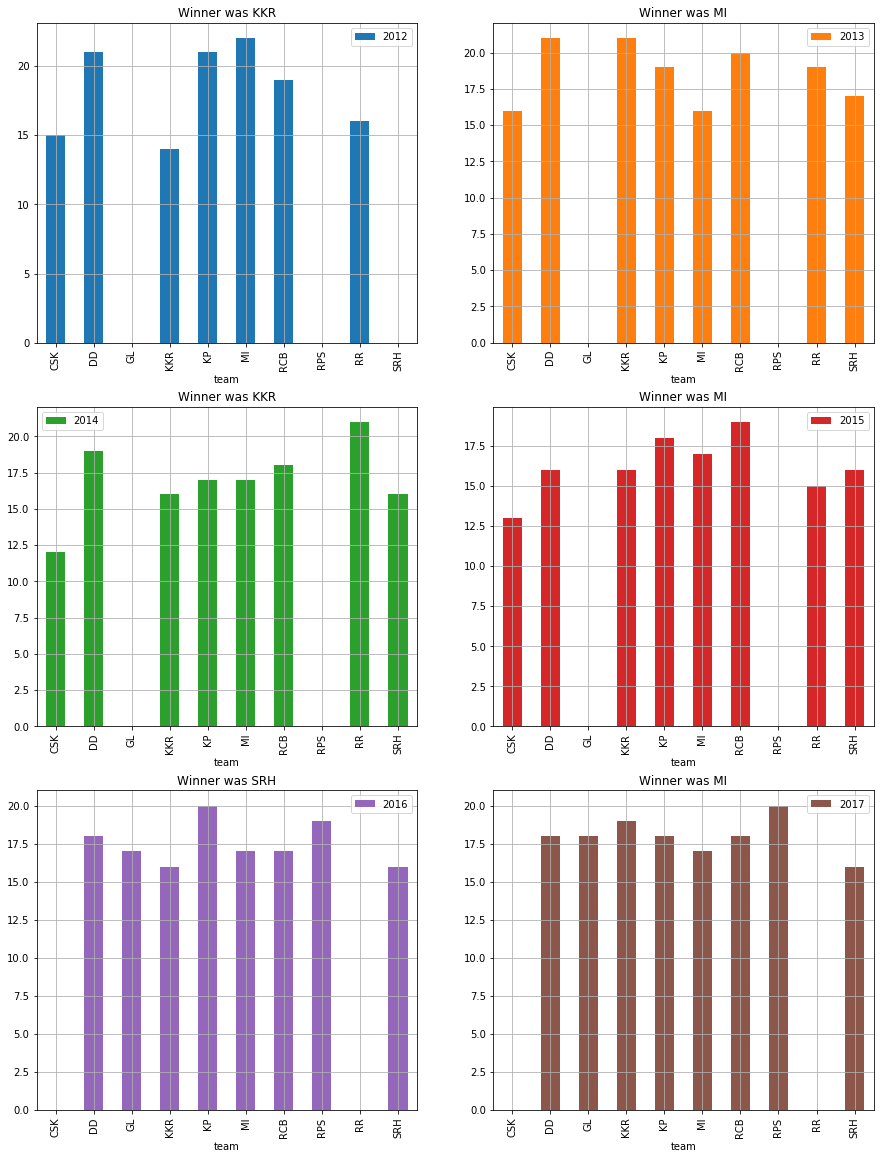

In [461]:
df = get_batting_statistics(df_batsmen,'50','count','50')
print (df)
axes = df.T.plot(kind = 'bar',grid = True,subplots = True ,
                 legend=True, sharex=False,
                 title = ['Winner was '+str(df3[df3[col] == 1].index.get_values().tolist()[0]) for col in df3.columns],
                 layout=(3,2), figsize = (15,20) )

### Percentage of runs scored by Batsmen in boundaries throughout the ipl seasons

team    CSK     DD     GL    KKR     KP     MI    RCB    RPS     RR    SRH
year                                                                      
2012  55.36  60.35    NaN  53.23  55.56  57.87  61.51    NaN  58.42    NaN
2013  54.96  54.21    NaN  57.36  59.08  60.11  63.37    NaN  57.88  50.23
2014  59.23  54.90    NaN  56.83  64.09  58.34  60.84    NaN  57.31  56.61
2015  61.31  60.94    NaN  62.30  55.58  64.65  66.39    NaN  55.84  57.35
2016    NaN  55.44  58.07  54.66  53.05  61.79  63.15  55.66    NaN  57.20
2017    NaN  62.41  61.67  60.92  60.79  60.95  55.80  55.78    NaN  57.47


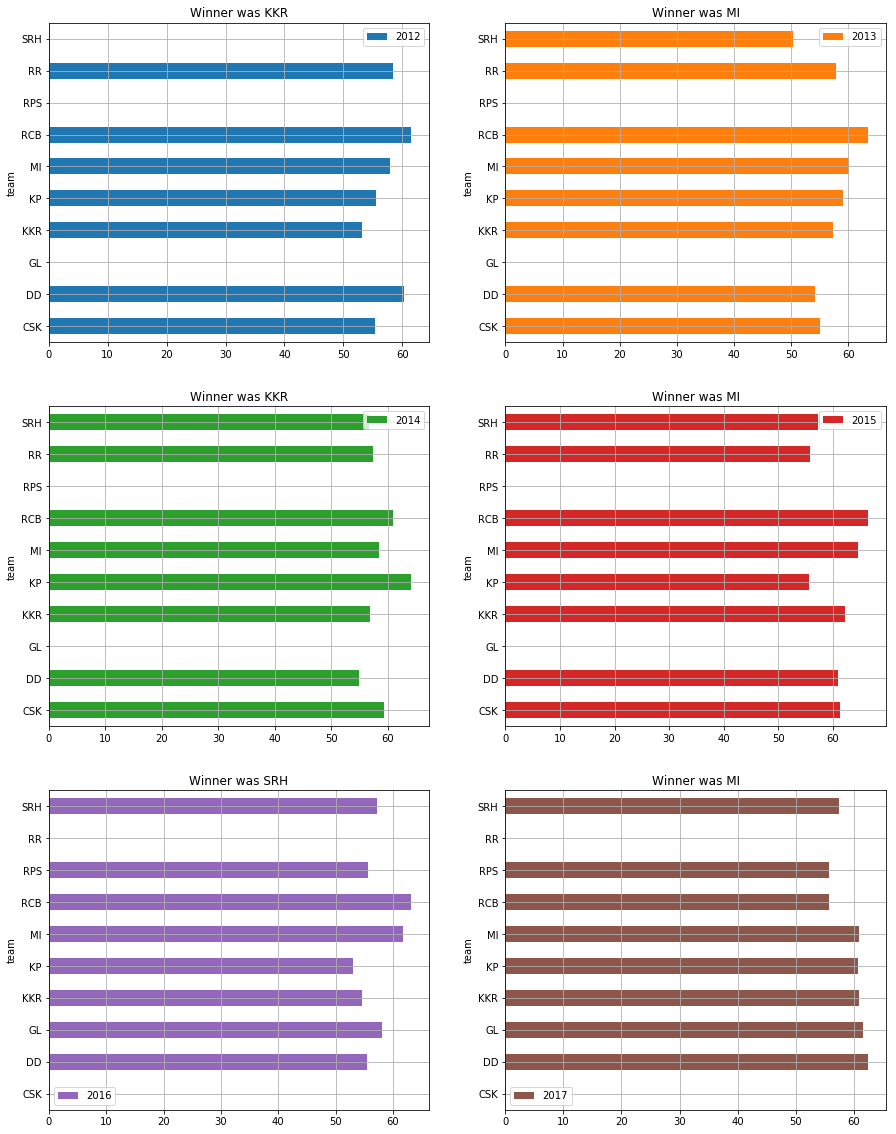

In [459]:
df_runs=get_batting_statistics(df_batsmen,'Runs','sum','Runs')
df6 = get_batting_statistics(df_batsmen,'6s','sum','6s')
df4 = get_batting_statistics(df_batsmen,'4s','sum','4s')
df6 = df6.multiply(6,axis=0)
df4 = df4.multiply(4,axis=0)
df4_6 = df6.add(df4)
df4_6_pct= df4_6.divide(df_runs).multiply(100,axis=0)
print(df4_6_pct.round(2))

axes=df4_6_pct.T.plot(kind = 'barh',grid = True,subplots = True ,
                 legend=True, sharex=False,
                 title = ['Winner was '+str(df3[df3[col] == 1].index.get_values().tolist()[0]) for col in df3.columns],
                 layout=(3,2), figsize = (15,20) )

In [474]:
batsmen = df_batsmen.groupby(['team','Player']).agg({'Runs':'sum'})
batsmen.sort_values(by='Runs',axis=0,ascending=False,inplace=True,kind='mergesort')
batsmen

Runs
team Player              
RCB  V Kohli         3143
MI   RG Sharma       2665
KKR  G Gambhir       2657
SRH  DA Warner       2579
RCB  CH Gayle        2555
     AB de Villiers  2490
SRH  S Dhawan        2021
RR   AM Rahane       1927
MI   KA Pollard      1924
CSK  SK Raina        1886
KKR  RV Uthappa      1806
MI   AT Rayudu       1665
KKR  YK Pathan       1610
KP   DA Miller       1563
CSK  MS Dhoni        1562
RR   SR Watson       1385
KKR  MK Pandey       1270
KP   SE Marsh        1210
     GJ Maxwell      1186
     WP Saha         1115
CSK  F du Plessis    1081
MI   LMP Simmons     1079
CSK  MEK Hussey      1071
DD   JP Duminy       1015
CSK  DR Smith         965
KP   M Vohra          957
RR   R Dravid         933
MI   PA Patel         911
KKR  JH Kallis        871
RPS  AM Rahane        862
...                   ...
MI   M de Lange         1
     P Kumar            1
RCB  KW Richardson      1
RPS  LH Ferguson        1
RR   J Theron           1
     KW Richardson      1
     R Shukla           1
     S Sreesanth        1
     SW Tait            1
     VS Malik           1
SRH  A Nehra            1
CSK  BW Hilfenhaus      0
     DP Nannes          0
DD   Sunny Gupta        0
GL   MM Patel           0
     S Kaushik          0
KKR  PJ Cummins         0
MI   AC Blizzard        0
     DJ Jacobs          0
     SA Yadav           0
RCB  P Parameswaran     0
     RR Bhatkal         0
RPS  I Sharma           0
     Imran Tahir        0
     M Ashwin           0
     SN Thakur          0
RR   A Singh            0
SRH  CJ Jordan          0
     I Sharma           0
     S Kaul             0

[452 rows x 1 columns]

In [452]:
df_runs=get_batting_statistics(df_batsmen,'Runs','sum','Runs')
df6 = get_batting_statistics(df_batsmen,'6s','sum','6s')
df4 = get_batting_statistics(df_batsmen,'4s','sum','4s')
df6 = df6.multiply(6,axis=0)
df4 = df4.multiply(4,axis=0)
df4_6 = df6.add(df4)
df4_6_pct= df4_6.divide(df_runs).multiply(100,axis=0)